In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/ubuntu/Spell_Correction/Spell_Corrections/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Example Neural Network

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
n_features=10
n_dense_neuron=3

In [4]:
x=tf.placeholder(tf.float32,(None, n_features))

In [5]:
W=tf.Variable(tf.random_normal([n_features,n_dense_neuron]))
b=tf.Variable(tf.ones([n_dense_neuron]))

In [6]:
xW=tf.matmul(x,W)
z=tf.add(xW, b)

In [7]:
a=tf.sigmoid(z)

In [8]:
init=tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
    sess.run(init)
    layer_out=sess.run(a,feed_dict={x:np.random.random([1,n_features])})
print(layer_out)

[[0.725475   0.43900672 0.30847842]]


## Simple Regression Example

In [10]:
x_data=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
display(x_data)
y_label=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
display(y_label)

array([0.16268277, 0.66750697, 1.26789943, 4.19013862, 5.84089411,
       4.75261654, 5.41735097, 8.08842304, 9.57586716, 9.32871649])

array([ 0.55591899,  1.16471353,  0.86767583,  2.24694105,  3.50534672,
        7.03850926,  6.72866286,  8.01414638,  9.59334606, 10.12588532])

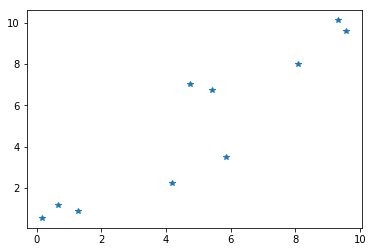

In [11]:
plt.plot(x_data,y_label,'*')

### y = mX+b

In [12]:
np.random.rand(2)

array([0.91315356, 0.80792015])

In [13]:
m=tf.Variable(0.91)
b=tf.Variable(0.80)

In [14]:
error=0
for x,y in zip(x_data,y_label):
    y_hat=m*x + b
    error += (y-y_hat)**2

In [15]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.03)
#optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-3)
train=optimizer.minimize(error)

In [16]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    training_steps=20
    for i in range(training_steps):
        sess.run(train)
    final_slop, intercept= sess.run([m,b])
    print(final_slop, intercept)

(0.9651934, 0.2655145)


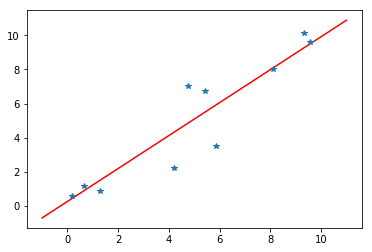

In [17]:
x_test=np.linspace(-1,11,10)
#y= mx + b
y_pred_plot= final_slop*x_test +intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

array([-0.29100651,  0.68278414,  3.58085237,  2.86422807,  5.53974389,
        6.54638869,  6.78115101,  9.0451859 ,  7.68032833,  8.80854248])

array([ 0.60452189,  2.28255072,  1.20090312,  2.66005097,  4.96191903,
        4.54846493,  7.27078008,  7.74068344,  9.43092219, 10.06464458])

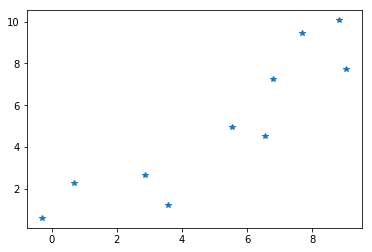

(0.86653936, 0.76653254)


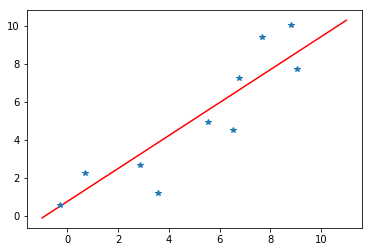

In [18]:
x_data=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
display(x_data)
y_label=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
display(y_label)
#####
plt.plot(x_data,y_label,'*')
plt.show()
#####
m=tf.Variable(0.91)
b=tf.Variable(0.80)
#####
error=0
for x,y in zip(x_data,y_label):
    y_hat=m*x + b
    error += (y-y_hat)**2
#####
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train=optimizer.minimize(error)
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    training_steps=100
    for i in range(training_steps):
        sess.run(train)
    final_slop, intercept= sess.run([m,b])
    print(final_slop, intercept)
    
x_test=np.linspace(-1,11,10)
#y= mx + b
y_pred_plot= final_slop*x_test +intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')